# Homework 2

## Convert Image To Pixel Art!

In this assignment, you must use the downsampling to process the image. The process is performed by using two color models, i.e. RGB and HIS.  
Given a 512x512 image, transform the image into four result images with different resolution, 128*128, 64*64, 32*32 and 16*16. You can divide the original image  into a block image of N*N, where N is 16, 32, 64 and 128. Select a color for each block and get the result image.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from math import pi
import warnings
warnings.filterwarnings('ignore')

img = cv.imread('01.jpg')

In [2]:
def rgb2hsi(rgb_img):
    b, g, r = cv.split(rgb_img)

    #讓範圍落在0~1之間
    b = b / 255.0
    g = g / 255.0
    r = r / 255.0

    hsi_img = rgb_img.copy()
    h, s, i = cv.split(hsi_img)
    
    for x in range(512):
        for y in range(512):
            num = 0.5 * ((r[x, y]-g[x, y])+(r[x, y]-b[x, y])) 
            den = np.sqrt((r[x, y]-g[x, y]) ** 2 + (r[x, y]-b[x, y]) * (g[x, y]-b[x, y]))
            theta = float(np.arccos(num / den))

            if den == 0:
                h = 0
            elif b[x, y] <= g[x, y]:
                h = theta
            else:
                h = 2 * pi - theta
            min_rgb = min(min(b[x, y], g[x, y]), r[x, y])
            sum = b[x, y] + g[x, y] + r[x, y]
            if sum == 0:
                s = 0
            else:
                s = 1 - 3 * min_rgb / sum
            h = h / (2 * pi)
            i = sum /3.0
            #擴充到255以方便顯示，h分量在[0,2pi]之間，s和i在[0,1]之間
            hsi_img[x, y, 0] = h * 255
            hsi_img[x, y, 1] = s * 255
            hsi_img[x, y, 2] = i * 255
    return hsi_img

In [3]:
def pixel_art(img, n):
    new_img = img.copy()
    x = y = 0
    while x != 512 and y != 512:
        new_img[x:x+n:, y:y+n:, 0] = np.sum(new_img[x:x+n:, y:y+n:, 0]) / (n * n)
        new_img[x:x+n:, y:y+n:, 1] = np.sum(new_img[x:x+n:, y:y+n:, 1]) / (n * n)
        new_img[x:x+n:, y:y+n:, 2] = np.sum(new_img[x:x+n:, y:y+n:, 2]) / (n * n)
        x += n
        if x == 512:
            x = 0
            y += n
    return new_img

In [4]:
def show_img(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [5]:
def create(img, img_name, n):
    new_img = pixel_art(img, n)
    show_img(new_img)

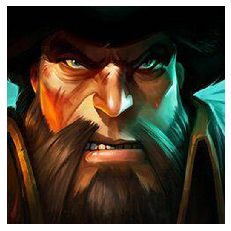

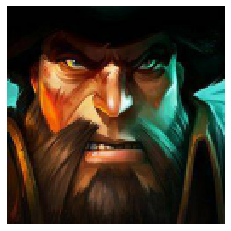

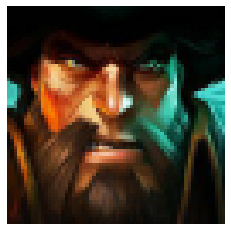

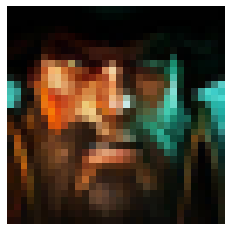

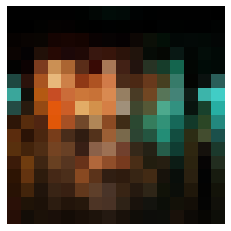

In [6]:
#RGB
show_img(img)
rgb_128 = rgb_64 = rgb_32 = rgb_16 = img.copy()
create(rgb_128, 'rgb_128.jpg', 4)
create(rgb_64, 'rgb_64.jpg', 8)
create(rgb_32, 'rgb_32.jpg', 16)
create(rgb_16, 'rgb_16.jpg', 32)

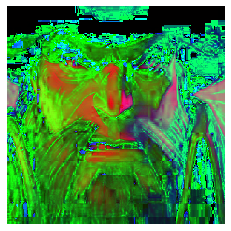

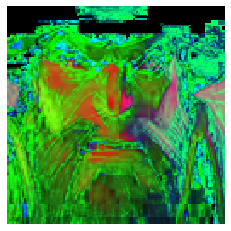

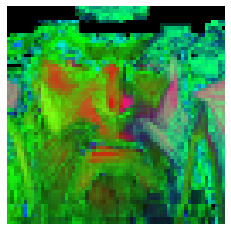

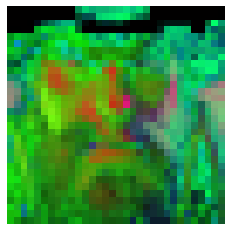

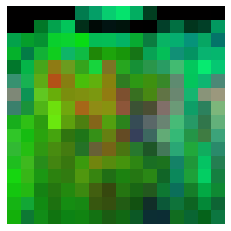

In [7]:
#HSI
hsi_img = rgb2hsi(img)
show_img(hsi_img)
hsi_128 = hsi_64 = hsi_32 = hsi_16 = hsi_img.copy()
create(hsi_128, 'hsi_128.jpg', 4)
create(hsi_64, 'hsi_64.jpg', 8)
create(hsi_32, 'hsi_32.jpg', 16)
create(hsi_16, 'hsi_16.jpg', 32)